# Data Pre-processing

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
raw_data1 = pd.read_csv(r"D:\github\texture_haptic\raw_data\s1_f175_i001.txt", names=["Timestamp", "Platform", "Rotary"])
raw_data2 = pd.read_csv(r"D:\github\texture_haptic\raw_data\s2_f150_i001.txt", names=["Timestamp", "Platform", "Rotary"])

# Feature Extraction

In [259]:
I = 0.175

In [260]:
time_now = pd.DataFrame({'Timestamp':raw_data1['Timestamp']})
time_prev = pd.DataFrame({'Timestamp':raw_data1['Timestamp']})
row = pd.DataFrame({'Timestamp': [0]})
time_prev = pd.concat([row,time_prev.loc[:]]).reset_index(drop=True)
time_prev = time_prev.drop(time_prev.index[-1])
raw_data1['dt'] = time_now['Timestamp'] - time_prev['Timestamp'] 

In [261]:
dt = raw_data1['dt']
Platform_now = pd.DataFrame({'Platform':raw_data1['Platform']})
Platform_prev = pd.DataFrame({'Platform':raw_data1['Platform']})
row = pd.DataFrame({'Platform': [0]})
Platform_prev = pd.concat([row,Platform_prev.loc[:]]).reset_index(drop=True)
Platform_prev = Platform_prev.drop(Platform_prev.index[-1])
difference = (Platform_now['Platform'] - Platform_prev['Platform'] )
raw_data1['Platform Velocity'] = difference.div(dt)
raw_data1['Platform Velocity'] = raw_data1['Platform Velocity'].rolling(10).mean()*1e-6

#df["result"] = df["col1"]/df["col2"]


In [262]:
Rotary_now = pd.DataFrame({'Rotary':raw_data1['Rotary']})
Rotary_prev = pd.DataFrame({'Rotary':raw_data1['Rotary']})
row = pd.DataFrame({'Rotary': [0]})
Rotary_prev = pd.concat([row,Rotary_prev.loc[:]]).reset_index(drop=True)
Rotary_prev = Rotary_prev.drop(Rotary_prev.index[-1])
difference = (Rotary_now['Rotary'] - Rotary_prev['Rotary'] )
raw_data1['Rotary Velocity'] = difference.div(dt)
raw_data1['Rotary Velocity'] = raw_data1['Rotary Velocity'].rolling(300).mean()*1e-6


In [264]:
raw_data1['Current'] = [I]*len(raw_data1)

In [ ]:
g_dob = 1000
Kt_n = 13.5*1e-2
J_n = 0.268*1e-4



In [265]:
raw_data1

,Timestamp,Platform,Rotary,dt,Platform Velocity,Rotary Velocity,Current
0,0.000116,0,0,0.000116,NaN,NaN,0.175
1,0.000202,0,0,0.000086,NaN,NaN,0.175
2,0.000243,0,0,0.000041,NaN,NaN,0.175
3,0.000264,0,0,0.000021,NaN,NaN,0.175
4,0.000284,0,0,0.000020,NaN,NaN,0.175
...,...,...,...,...,...,...,...
399995,7.627492,86772,112,0.000019,0.015789,0.0,0.175
399996,7.627511,86772,112,0.000019,0.015789,0.0,0.175
399997,7.627530,86772,112,0.000019,0.015789,0.0,0.175
399998,7.627549,86772,112,0.000019,0.010526,0.0,0.175


In [238]:
start1 = np.where([raw_data1['Timestamp']<3])
start1 = start1[1][-1]

end1 = np.where([raw_data1['Timestamp']>7])
end1 = end1[1][0]


#start2 = np.where([raw_data2['Timestamp']<3])
#start2 = start2[1][-1]

#end2 = np.where([raw_data2['Timestamp']>7])
#end2 = end2[1][0]

In [239]:
start3 = np.where([raw_data1['Platform']<18000])
start3 = start3[1][-1]



end3 = np.where([raw_data1['Platform']>80000])
end3 = end3[1][0]

#start2 = np.where([raw_data2['Timestamp']<3])
#start2 = start2[1][-1]

#end2 = np.where([raw_data2['Timestamp']>7])
#end2 = end2[1][0]

In [240]:
sliced_data1 = raw_data1[start1+1:end1]
sliced_data1

#sliced_data2 = raw_data2[start1+1:end1]
#sliced_data2

,Timestamp,Platform,Rotary,dt,Platform Velocity,Rotary Velocity
157254,3.000001,30751,93,0.000019,0.010819,0.000526
157255,3.000020,30751,93,0.000019,0.010819,0.000526
157256,3.000039,30752,93,0.000019,0.016082,0.000526
157257,3.000058,30752,93,0.000019,0.010819,0.000526
157258,3.000077,30752,93,0.000019,0.010819,0.000526
...,...,...,...,...,...,...
367149,6.999917,78976,109,0.000019,0.005263,0.000351
367150,6.999936,78977,109,0.000019,0.010526,0.000351
367151,6.999955,78977,109,0.000019,0.010526,0.000351
367152,6.999974,78977,109,0.000019,0.010526,0.000351


In [241]:
sliced_data3 = raw_data1[start3:end3]
sliced_data3

#sliced_data2 = raw_data2[start1+1:end1]
#sliced_data2

,Timestamp,Platform,Rotary,dt,Platform Velocity,Rotary Velocity
119069,2.272540,17999,107,0.000018,0.015789,0.000000
119070,2.272559,18000,107,0.000019,0.021053,0.000000
119071,2.272578,18000,107,0.000019,0.021053,0.000000
119072,2.272597,18001,107,0.000019,0.021053,0.000000
119073,2.272616,18001,107,0.000019,0.021053,0.000000
...,...,...,...,...,...,...
371614,7.084909,80000,106,0.000020,0.015025,0.000712
371615,7.084928,80000,106,0.000019,0.015025,0.000712
371616,7.084946,80000,106,0.000018,0.015025,0.000712
371617,7.084965,80000,106,0.000019,0.009762,0.000712


In [242]:
j = sliced_data1['Timestamp'][start1+1]
k = sliced_data3['Platform'][start3]

In [243]:
Timestamp1 = sliced_data1['Timestamp'] 
Platform_disp1 = sliced_data1['Platform']
Rotary_disp1 = sliced_data1['Rotary']*5-sliced_data1['Rotary'].mean()*5
sliced_data1['Rotary'] = Rotary_disp1

Timestamp3 = sliced_data3['Timestamp']
Platform_disp3 = sliced_data3['Platform'] 
Rotary_disp3 = sliced_data3['Rotary']*5-sliced_data3['Rotary'].mean()*5

#Timestamp2 = sliced_data2['Timestamp']
#Platform_disp2 = sliced_data2['Platform']
#Rotary_disp2 = sliced_data2['Rotary']*5-sliced_data2['Rotary'].mean()*5

C:\Users\Jayanaka Lakindu\AppData\Local\Temp\ipykernel_1228\1424088845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_data1['Rotary'] = Rotary_disp1


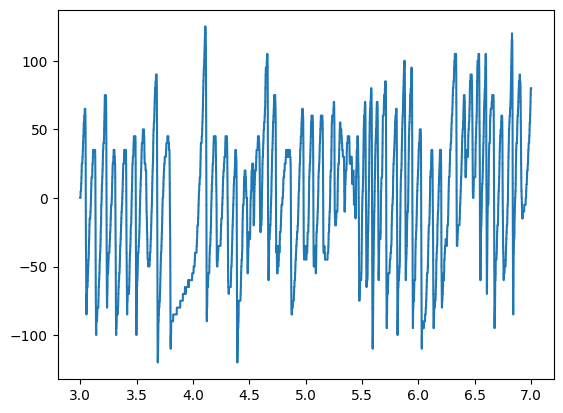

In [244]:
fig = plt.figure()
#axis = fig.add_axes("")
plt.plot(Timestamp1,Rotary_disp1)
#plt.plot(Platform_disp2,Rotary_disp2)

In [245]:
#fig2 = plt.figure()
#axis = fig.add_axes("")
#plt.plot(Platform_disp3,Rotary_disp3)
#plt.plot(Platform_disp2,Rotary_disp2)
sliced_data1['Timestamp'] = sliced_data1['Timestamp'] - sliced_data1.iloc[0]['Timestamp']

C:\Users\Jayanaka Lakindu\AppData\Local\Temp\ipykernel_1228\664199147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_data1['Timestamp'] = sliced_data1['Timestamp'] - sliced_data1.iloc[0]['Timestamp']


jsjs

# Slicing and Writing to seperate files (52450 per file)

In [246]:
#Slice_count = np.where([sliced_data1['Timestamp']<=4])
#Slice_count = Slice_count[1][-1]
Slice_count = 52450

In [247]:


for i in range(5):
    data = sliced_data1[i*(Slice_count):(i+1)*(Slice_count)]
    data['Timestamp'] = data['Timestamp'] - data.iloc[0]['Timestamp']
    data['Platform'] = data['Platform'] - data.iloc[0]['Platform']
    data['Rotary'] = data['Rotary'] - data['Rotary'].mean() 
    data.to_csv(r"D:\FYP\ML\s1_f175_i001_" + str(i+1) +".csv",index=False)


C:\Users\Jayanaka Lakindu\AppData\Local\Temp\ipykernel_1228\365370525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = data['Timestamp'] - data.iloc[0]['Timestamp']
C:\Users\Jayanaka Lakindu\AppData\Local\Temp\ipykernel_1228\365370525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Platform'] = data['Platform'] - data.iloc[0]['Platform']
C:\Users\Jayanaka Lakindu\AppData\Local\Temp\ipykernel_1228\365370525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 